# Importiing Libraries

In [234]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
import matplotlib 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.special import expit

import lime
from lime import lime_tabular

#ML models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Reading CSV File

In [136]:
ds = pd.read_csv("smoking.csv")

In [137]:
ds.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1,1,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1,1,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1,1,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1,1,...,12.5,1,0.6,16,14,22,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1,1,...,16.2,1,1.2,18,27,33,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1,1,...,17.0,1,0.7,21,27,39,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1,1,...,15.0,1,1.3,38,71,111,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1,1,...,13.7,1,0.8,31,31,14,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1,1,...,16.0,1,0.8,26,24,63,Y,0,N,0


In [138]:
ds.shape

(55693, 27)

# Data Preprocessing

In [139]:
#dropping ID as it is not any actual feature & Oral has only one class
ds= ds.drop(['ID', 'oral'], axis = 'columns')
ds.head(10)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1,1,114,...,126,12.9,1,0.7,18,19,27,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1,1,119,...,127,12.7,1,0.6,22,19,18,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1,1,138,...,151,15.8,1,1.0,21,16,22,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1,1,100,...,226,14.7,1,1.0,19,26,18,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1,1,120,...,107,12.5,1,0.6,16,14,22,0,N,0
5,M,30,180,75,85.0,1.2,1.2,1,1,128,...,129,16.2,1,1.2,18,27,33,0,Y,0
6,M,40,160,60,85.5,1.0,1.0,1,1,116,...,157,17.0,1,0.7,21,27,39,1,Y,1
7,M,45,165,90,96.0,1.2,1.0,1,1,153,...,134,15.0,1,1.3,38,71,111,0,Y,0
8,F,50,150,60,85.0,0.7,0.8,1,1,115,...,149,13.7,1,0.8,31,31,14,0,N,0
9,M,45,175,75,89.0,1.0,1.0,1,1,113,...,126,16.0,1,0.8,26,24,63,0,N,0


In [140]:
ds.shape

(55693, 25)

In [141]:
ds.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [142]:
duplicated= ds[ds.duplicated()]

In [143]:
duplicated.shape

(11141, 25)

In [144]:
ds.drop_duplicates(inplace = True)

# Checking Categorical values classes

In [145]:
ds['gender'].value_counts()

M    28349
F    16203
Name: gender, dtype: int64

In [146]:
ds['tartar'].value_counts()

Y    24761
N    19791
Name: tartar, dtype: int64

# Label Encoding

In [147]:
ds.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [148]:
#assigning label encoder
le = LabelEncoder()
#label encoding gender, oral and tartar
#gender: F=0, M=1; tartar: Y=1, N=0
ds[['gender', 'tartar']]= ds[['gender', 'tartar']].apply(le.fit_transform)

In [149]:
print(ds.shape)
ds.head(10)

(44552, 25)


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1,1,114,...,126,12.9,1,0.7,18,19,27,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1,1,119,...,127,12.7,1,0.6,22,19,18,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1,1,138,...,151,15.8,1,1.0,21,16,22,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1,1,100,...,226,14.7,1,1.0,19,26,18,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1,1,120,...,107,12.5,1,0.6,16,14,22,0,0,0
5,1,30,180,75,85.0,1.2,1.2,1,1,128,...,129,16.2,1,1.2,18,27,33,0,1,0
6,1,40,160,60,85.5,1.0,1.0,1,1,116,...,157,17.0,1,0.7,21,27,39,1,1,1
7,1,45,165,90,96.0,1.2,1.0,1,1,153,...,134,15.0,1,1.3,38,71,111,0,1,0
8,0,50,150,60,85.0,0.7,0.8,1,1,115,...,149,13.7,1,0.8,31,31,14,0,0,0
9,1,45,175,75,89.0,1.0,1.0,1,1,113,...,126,16.0,1,0.8,26,24,63,0,0,0


# EDA

In [150]:
ds.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

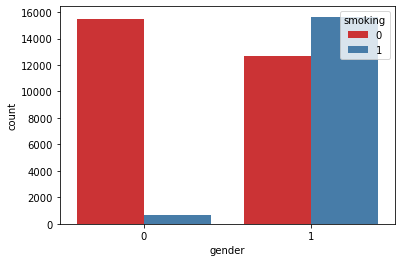

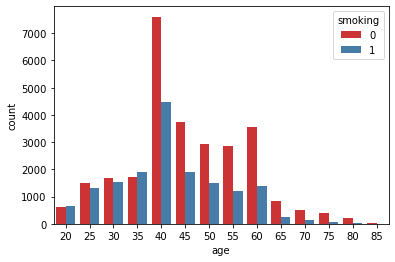

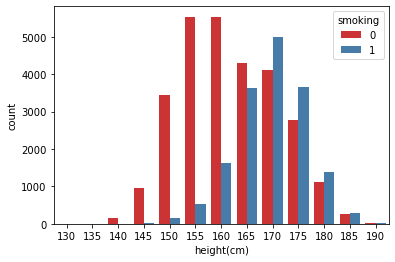

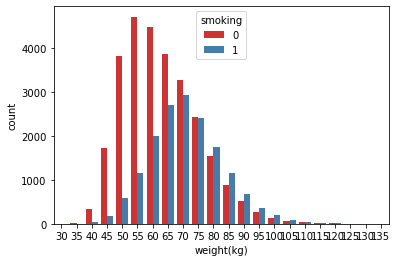

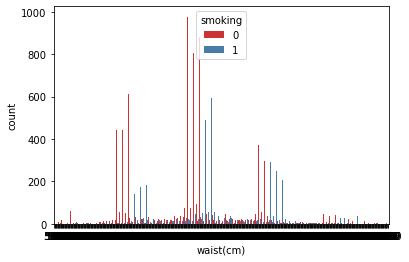

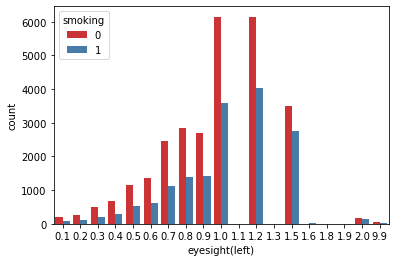

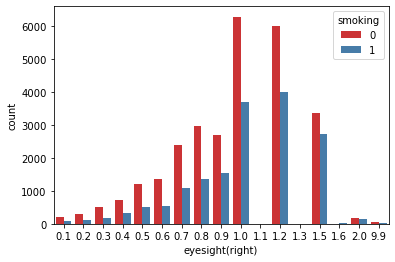

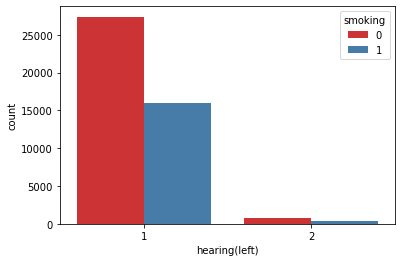

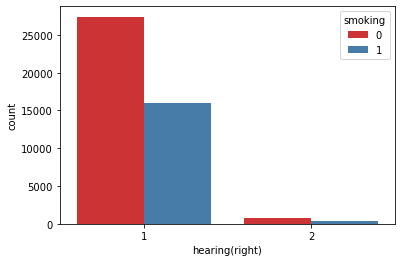

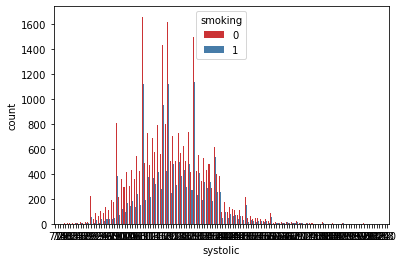

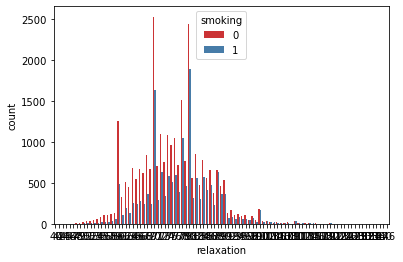

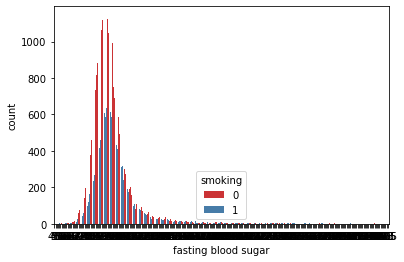

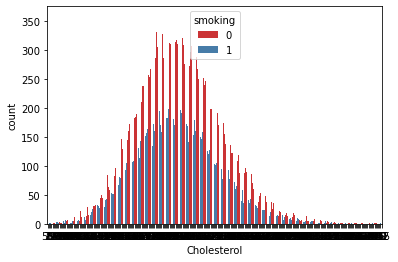

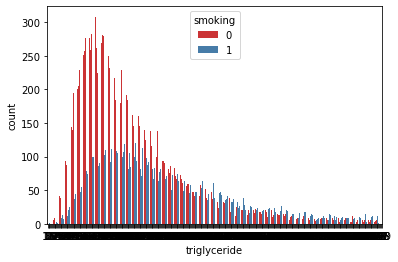

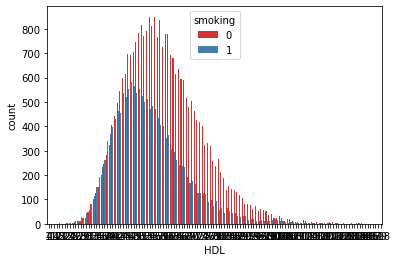

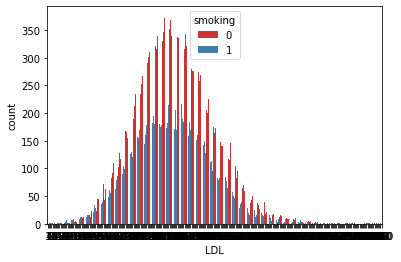

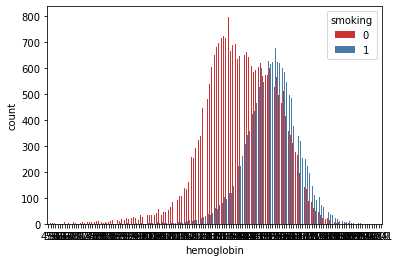

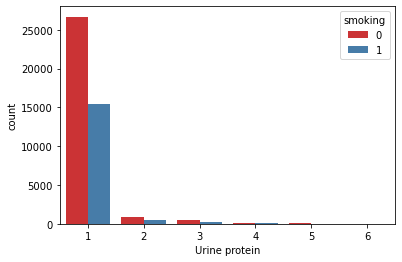

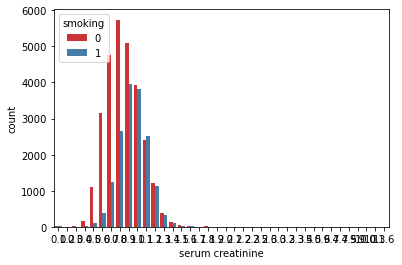

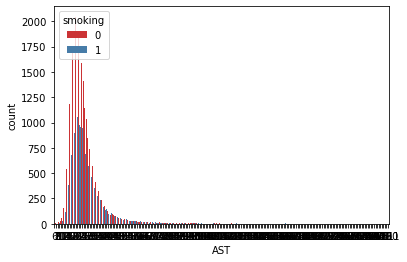

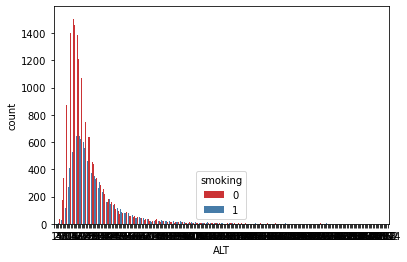

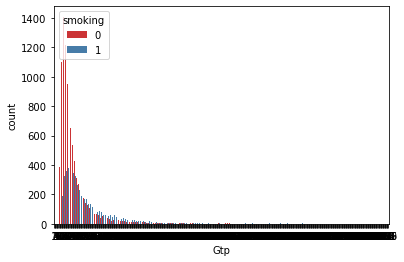

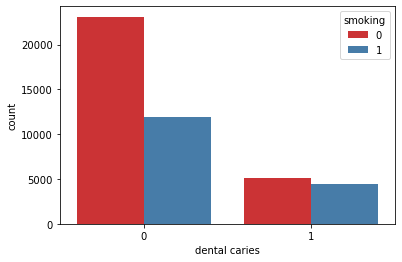

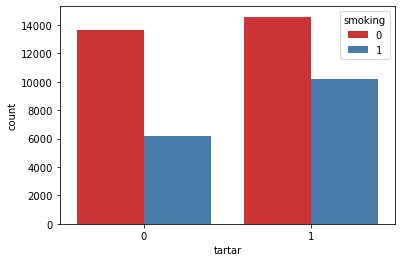

In [151]:
cat_features =ds.columns[:24]
cat_features
for f in cat_features:
    plt.figure()
    sns.countplot(x = f, data = ds, hue = 'smoking', palette = 'Set1')

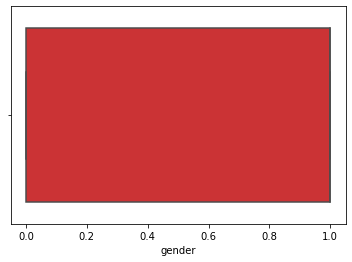

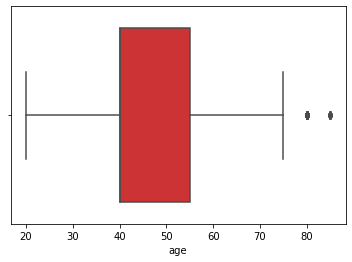

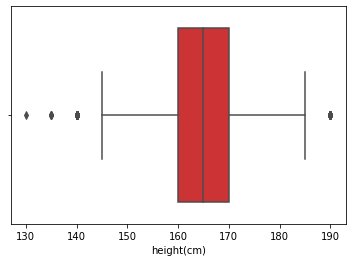

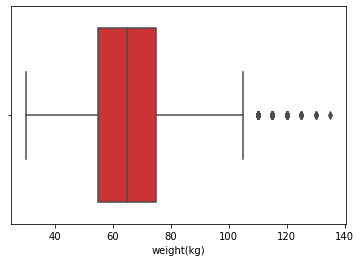

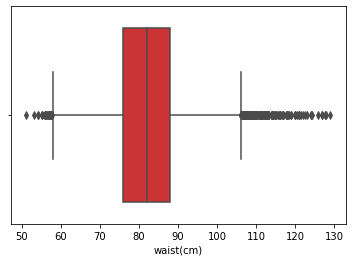

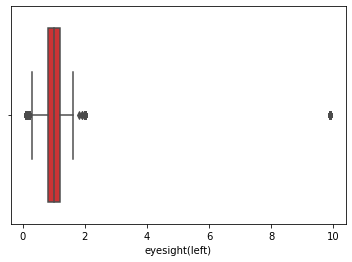

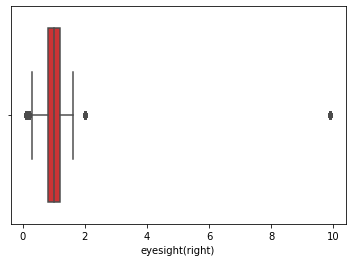

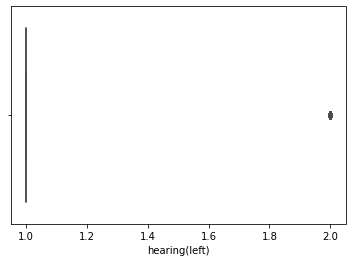

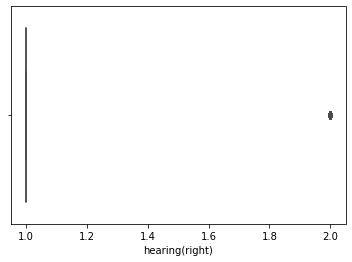

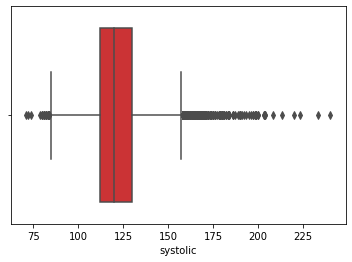

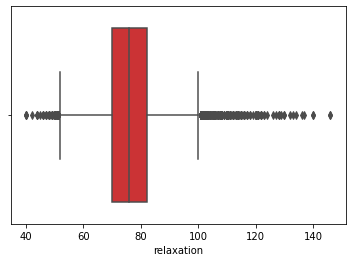

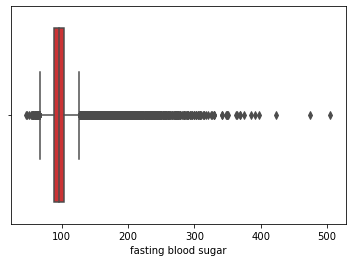

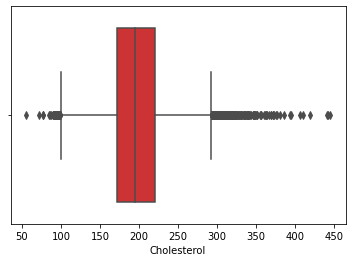

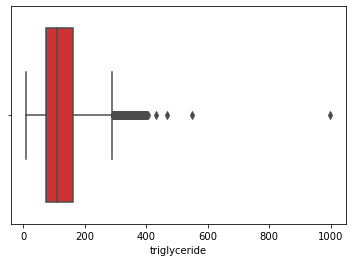

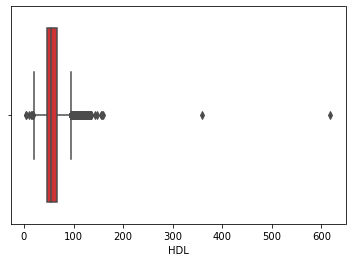

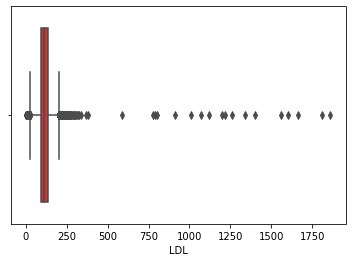

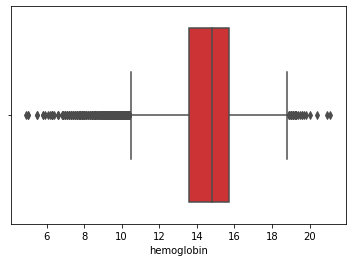

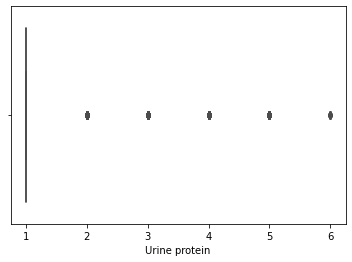

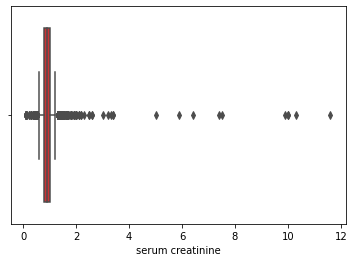

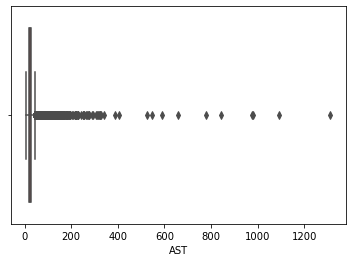

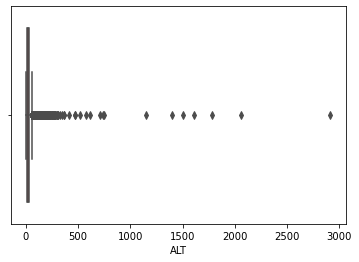

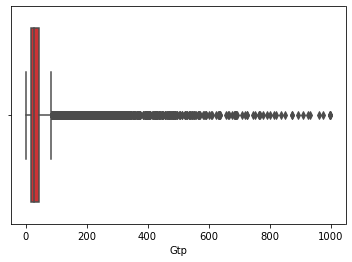

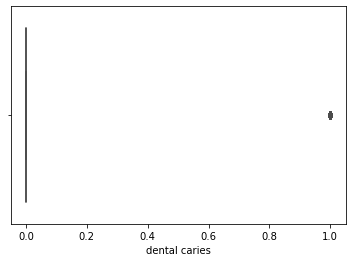

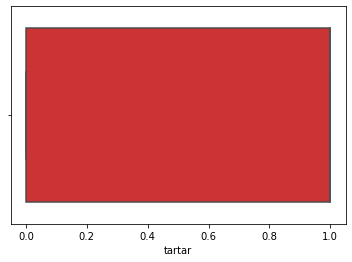

In [152]:
for f in cat_features:
    plt.figure()
    sns.boxplot(x = f, data = ds, hue = 'smoking', palette = 'Set1')

# Feature selection

In [153]:
#Splitting the dataset
y = ds['smoking']
X = ds.drop(['smoking'], axis = 'columns')

In [154]:
best_features = SelectKBest(k=10)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcols = pd.DataFrame(X.columns)

In [155]:
featureScores = pd.concat([dfcols, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

In [156]:
scalers = MinMaxScaler()
warnings.filterwarnings('ignore')

In [157]:
scalers.fit(featureScores[['Score']])

MinMaxScaler()

In [158]:
featureScores[['Score']] = scalers.transform(featureScores[['Score']])

In [159]:
featureScores

,Feature,Score
0,gender,1.000000
1,age,0.076077
2,height(cm),0.527789
3,weight(kg),0.283067
4,waist(cm),0.152236
5,eyesight(left),0.009481
6,eyesight(right),0.010558
7,hearing(left),0.000879
8,hearing(right),0.000224
9,systolic,0.014984


In [160]:
X.columns[best_features.get_support()]

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'triglyceride', 'HDL', 'hemoglobin', 'serum creatinine', 'Gtp'],
      dtype='object')

In [161]:
X = X[['gender', 'height(cm)', 'weight(kg)', 'waist(cm)', 'triglyceride','HDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp']]

In [162]:
X.head()

,gender,height(cm),weight(kg),waist(cm),triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp
0,0,155,60,81.3,82,73,12.9,0.7,19,27
1,0,160,60,81.0,115,42,12.7,0.6,19,18
2,1,170,60,80.0,182,55,15.8,1.0,16,22
3,1,165,70,88.0,254,45,14.7,1.0,26,18
4,0,155,60,86.0,74,62,12.5,0.6,14,22


In [163]:
# dfscores = pd.DataFrame(fit.scores_)
# dfcols = pd.DataFrame(X.columns)

In [164]:
# featureScores = pd.concat([dfcols, dfscores], axis=1)
# featureScores.columns = ['Feature', 'Score']

In [165]:
# featureScores

# Feature Scaling

In [166]:
# #Splitting the dataset
# y = ds['smoking']
# X = ds.drop(['smoking'], axis = 'columns')

In [167]:
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: smoking, dtype: int64

In [168]:
X.head(10)

,gender,height(cm),weight(kg),waist(cm),triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp
0,0,155,60,81.3,82,73,12.9,0.7,19,27
1,0,160,60,81.0,115,42,12.7,0.6,19,18
2,1,170,60,80.0,182,55,15.8,1.0,16,22
3,1,165,70,88.0,254,45,14.7,1.0,26,18
4,0,155,60,86.0,74,62,12.5,0.6,14,22
5,1,180,75,85.0,199,48,16.2,1.2,27,33
6,1,160,60,85.5,68,55,17.0,0.7,27,39
7,1,165,90,96.0,269,34,15.0,1.3,71,111
8,0,150,60,85.0,66,48,13.7,0.8,31,14
9,1,175,75,89.0,147,43,16.0,0.8,24,63


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

In [170]:
print(X_train.shape)
print(X_test.shape)

(35641, 10)
(8911, 10)


In [171]:
X_train.columns

Index(['gender', 'height(cm)', 'weight(kg)', 'waist(cm)', 'triglyceride',
       'HDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp'],
      dtype='object')

In [172]:
cols_scale = ['height(cm)', 'weight(kg)', 'waist(cm)', 'triglyceride', 'HDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp']

In [173]:
len(cols_scale)

9

In [174]:
scaler = MinMaxScaler()

In [175]:
scaler.fit(X_train[cols_scale])

MinMaxScaler()

In [176]:
X_train[cols_scale] = scaler.transform(X_train[cols_scale])
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

In [177]:
X_train.head()

,gender,height(cm),weight(kg),waist(cm),triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp
27689,1,0.750000,0.333333,0.435897,0.160440,0.081433,0.69375,0.080808,0.005493,0.029087
4217,1,0.666667,0.619048,0.653846,0.272527,0.109121,0.64375,0.080808,0.037075,0.207623
9098,0,0.583333,0.190476,0.166667,0.107692,0.140065,0.30000,0.080808,0.003090,0.013039
1126,0,0.333333,0.380952,0.602564,0.250549,0.073290,0.52500,0.070707,0.014075,0.024072
32786,0,0.250000,0.190476,0.371795,0.090110,0.078176,0.56875,0.070707,0.005836,0.024072


In [178]:
X_test.head()

,gender,height(cm),weight(kg),waist(cm),triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp
43563,1,0.583333,0.238095,0.341026,0.096703,0.087948,0.63750,0.101010,0.005493,0.020060
42343,1,0.750000,0.428571,0.378205,0.767033,0.040717,0.65625,0.080808,0.005836,0.049147
36053,1,0.833333,0.333333,0.357692,0.171429,0.102606,0.62500,0.080808,0.004119,0.012036
39499,1,0.666667,0.571429,0.628205,0.523077,0.100977,0.51250,0.121212,0.002746,0.062187
26113,1,0.666667,0.333333,0.474359,0.052747,0.099349,0.70000,0.090909,0.006866,0.027081


# KNN Classifier

In [179]:
# hyperparameter tuning
k = range(1, 40)
train_acc = [] # create empty list
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, knn_clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, y_pred))
    
print('done')

done


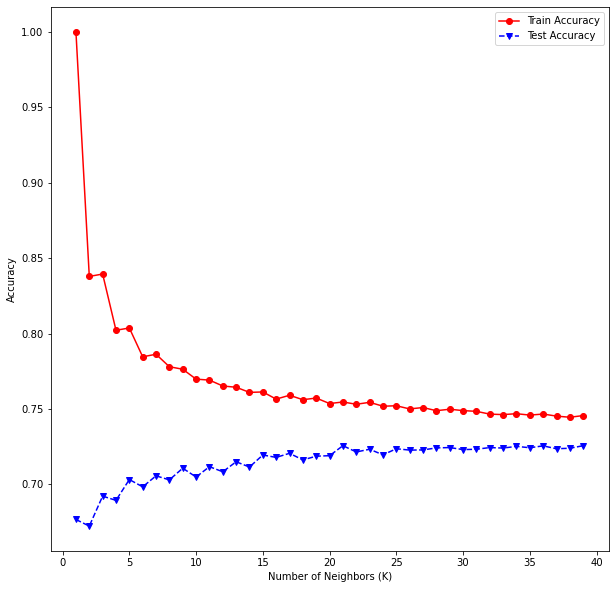

In [180]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [252]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [254]:
# n_neighbors = 21
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(start = 20, stop = 60, num = 10)]
n_neighbors = [int(x) for x in np.linspace(start = 15, stop = 30, num = 15)]
p = [1, 2]

In [255]:
random_grid = {'algorithm': algorithm,
               'leaf_size': leaf_size,
               'n_neighbors': n_neighbors,
               'p': p}

In [256]:
print(random_grid)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [20, 24, 28, 33, 37, 42, 46, 51, 55, 60], 'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30], 'p': [1, 2]}


In [257]:
#we find k= 21

In [258]:
knn_clf = KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator=knn_clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
# y_pred = knn_clf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
# print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [259]:
knn_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 24, 28, 33, 37, 42,
                                                      46, 51, 55, 60],
                                        'n_neighbors': [15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 30],
                                        'p': [1, 2]},
                   random_state=100, verbose=2)

In [260]:
knn_randomcv.best_params_

{'p': 1, 'n_neighbors': 27, 'leaf_size': 42, 'algorithm': 'kd_tree'}

In [261]:
knn_clf = KNeighborsClassifier(p= 1, n_neighbors= 27, leaf_size= 42, algorithm= 'kd_tree')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      5640
           1       0.62      0.66      0.64      3271

    accuracy                           0.73      8911
   macro avg       0.71      0.71      0.71      8911
weighted avg       0.73      0.73      0.73      8911

Train Accuracy:  0.7514098931006425
Test Accuracy:  0.7283133206149702


In [189]:
# Confusion Matrix function; w

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title, fontsize= 20)
    plt.ylabel('Actual label', fontsize= 20)
    plt.xlabel('Predicted label', fontsize= 20)

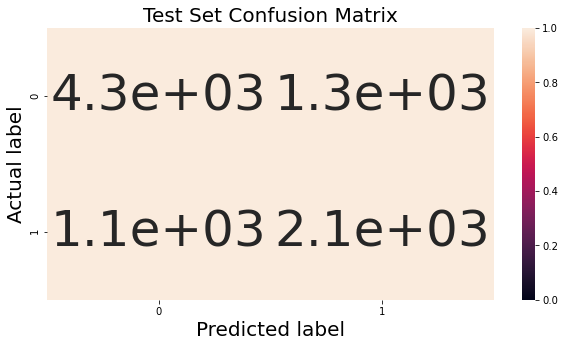

In [190]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
# plt.rcParams.update({'font.size': 22})

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=knn_clf.classes_, title='Test Set Confusion Matrix')

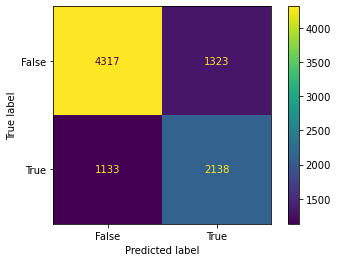

In [191]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

# Logistic Regression Classifier

In [198]:
l1_ratio = [float(x) for x in np.linspace(start = 0, stop = 1, num = 10)]
penalty = ['l1', 'l2', 'elasticnet']
solver = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']

In [199]:
random_grid = {'l1_ratio': l1_ratio,
               'penalty': penalty,
               'solver': solver}

In [203]:
print(random_grid)

{'l1_ratio': [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}


In [204]:
lr_clf = LogisticRegression()
lr_clf=RandomizedSearchCV(estimator=lr_clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [205]:
lr_clf.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'l1_ratio': [0.0, 0.1111111111111111,
                                                     0.2222222222222222,
                                                     0.3333333333333333,
                                                     0.4444444444444444,
                                                     0.5555555555555556,
                                                     0.6666666666666666,
                                                     0.7777777777777777,
                                                     0.8888888888888888, 1.0],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   random_state=100, verb

In [206]:
lr_clf.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'l1_ratio': 0.1111111111111111}

In [207]:
lr_clf = LogisticRegression(solver= 'liblinear', penalty= 'l1', l1_ratio= 0.1111111111111111)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, lr_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      5640
           1       0.64      0.71      0.67      3271

    accuracy                           0.74      8911
   macro avg       0.73      0.74      0.73      8911
weighted avg       0.75      0.74      0.75      8911

Train Accuracy:  0.7369041272691563
Test Accuracy:  0.7434631354505667


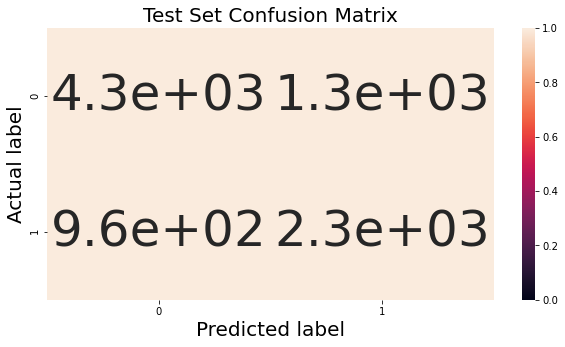

In [208]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
# plt.rcParams.update({'font.size': 22})

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=lr_clf.classes_, title='Test Set Confusion Matrix')

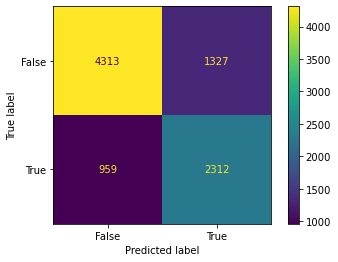

In [209]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

# Decision Tree Classifier

In [212]:
dt = DecisionTreeClassifier()

In [213]:
#Random Search
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 1000,50)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [214]:
# Randomized search on hyper parameters
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# Controls the verbosity: the higher, the more messages
# Number of jobs to run in parallel
### fit the randomized model
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [20, 40, 60, 80, 100, 120,
                                                      140, 160, 180, 200, 220,
                                                      240, 260, 280, 300, 320,
                                                      340, 360, 380, 400, 420,
                                                      440, 460, 480, 500, 520,
                                                      540, 560, 580, 600, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [215]:
dt_randomcv.best_params_
# Parameter setting that gave the best results

{'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 980,
 'criterion': 'gini'}

In [216]:
dt_randomcv

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [20, 40, 60, 80, 100, 120,
                                                      140, 160, 180, 200, 220,
                                                      240, 260, 280, 300, 320,
                                                      340, 360, 380, 400, 420,
                                                      440, 460, 480, 500, 520,
                                                      540, 560, 580, 600, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [279]:
dt =  DecisionTreeClassifier(min_samples_split = 2,
 min_samples_leaf = 8,
 max_features = 'sqrt',
 max_depth = 980,
 criterion = 'gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      5640
           1       0.60      0.59      0.60      3271

    accuracy                           0.71      8911
   macro avg       0.68      0.68      0.68      8911
weighted avg       0.70      0.71      0.71      8911

Train Accuracy:  0.8263236160601555
Test Accuracy:  0.7059813713387948


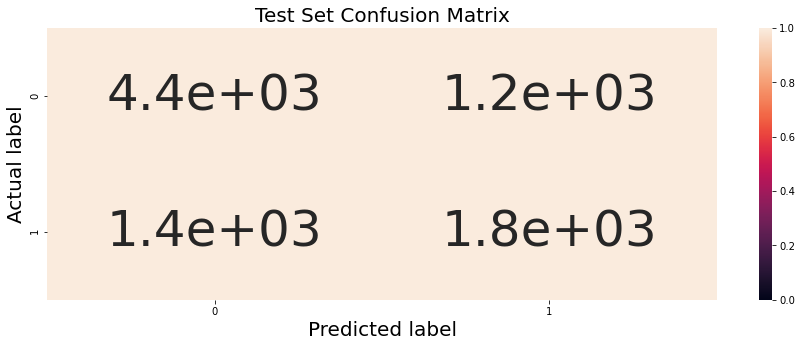

In [218]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,5))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

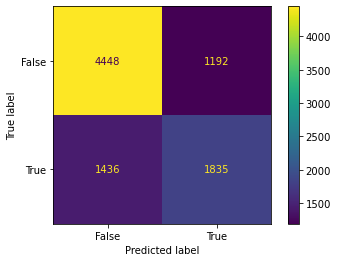

In [219]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

# SVM Classifier

In [235]:
clf = svm.SVC() 

In [236]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  18.2s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  18.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  18.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  18.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=  18.3s
[CV 1/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  18.2s
[CV 2/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  18.0s
[CV 3/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  18.0s
[CV 4/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  18.2s
[CV 5/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=  18.1s
[CV 1/5] END ....................C=1, gamma=1, kernel=linear; total time=  18.2s
[CV 2/5] END ....................C=1, gamma=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['linear']},
             verbose=3)

In [267]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [268]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))
print("Train Accuracy: ", accuracy_score(y_train, grid.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.55      0.69      5640
           1       0.55      0.96      0.70      3271

    accuracy                           0.70      8911
   macro avg       0.75      0.75      0.70      8911
weighted avg       0.81      0.70      0.70      8911

Train Accuracy:  0.7000084172722426
Test Accuracy:  0.7283133206149702


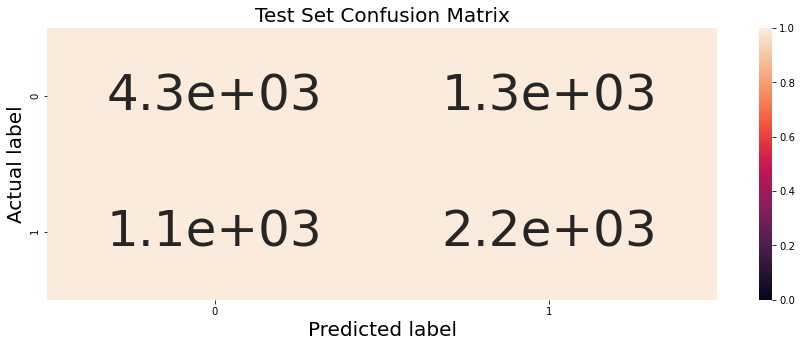

In [269]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,5))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

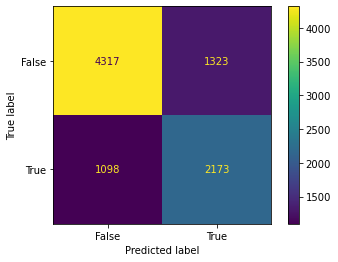

In [270]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

# Random Forest Classifier

In [220]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [221]:
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  1600


{'n_estimators': [10, 60, 110, 160, 210],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'max_features': ['sqrt', 'log2']}

In [222]:
def my_roc_auc_score(model, X, y): return metrics.roc_auc_score(y, model.predict(X))

model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid,
                              n_iter=50,
                              cv=3,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=2)

model_rf.fit(X,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.025, n_estimators=60; total time=   0.9s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.025, n_estimators=60; total time=   0.9s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.025, n_estimators=60; total time=   0.9s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=110; total time=   1.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=110; total time=   1.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.005, n_estimators=110; total time=   1.2s
[CV] END criterion=entropy, max_depth=35, max_features=sqrt, min_sample

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.015,
                                                             0.025, 0.035],
                                        'min_samples_split': [0.005, 0.015,
                                                              0.025, 0.035],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True,
                   scoring=<function my_roc_auc_score at 0x0000025B4F3A6C10>,
                   verbose=2)

In [224]:
model_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 0.015,
 'min_samples_leaf': 0.005,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini'}

In [225]:
df_cv_results = pd.DataFrame(model_rf.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results[:20]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
6,1,0.758911,0.762778,210,0.015,0.005,sqrt,None,gini
35,2,0.758744,0.764340,110,0.005,0.005,log2,None,gini
41,3,0.758206,0.760755,160,0.025,0.005,log2,35,entropy
17,4,0.758025,0.762136,10,0.015,0.005,sqrt,15,gini
0,5,0.757375,0.760279,60,0.025,0.005,log2,35,gini
14,6,0.757012,0.758646,160,0.015,0.015,log2,25,gini
43,7,0.756954,0.758342,60,0.035,0.005,log2,25,entropy
20,8,0.756946,0.758119,60,0.015,0.015,sqrt,15,entropy
23,9,0.756756,0.758505,110,0.025,0.015,sqrt,25,entropy
3,10,0.756644,0.758259,160,0.005,0.015,log2,None,entropy


In [226]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=None,
                                      max_features='sqrt',
                                      min_samples_leaf=0.005,
                                      min_samples_split=0.015,
                                      n_estimators=210)
model_rf_fin.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_leaf=0.005, min_samples_split=0.015,
                       n_estimators=210)

In [272]:
from sklearn.metrics import accuracy_score
y_pred=model_rf_fin.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, model_rf_fin.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      1.00      0.78      5640
           1       0.00      0.00      0.00      3271

    accuracy                           0.63      8911
   macro avg       0.32      0.50      0.39      8911
weighted avg       0.40      0.63      0.49      8911

Train Accuracy:  0.632978872646671
Test Accuracy:  0.6329255975760296


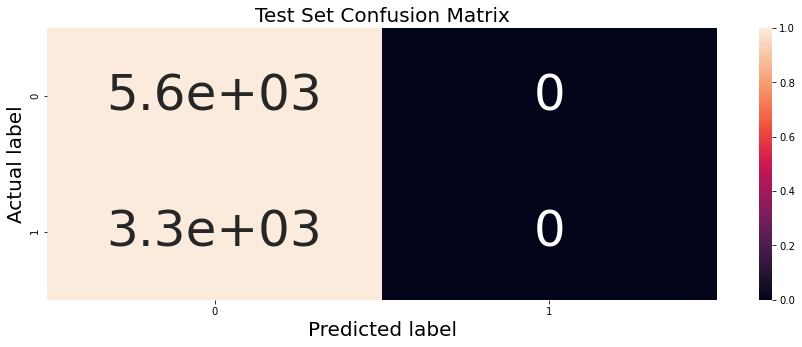

In [273]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,5))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

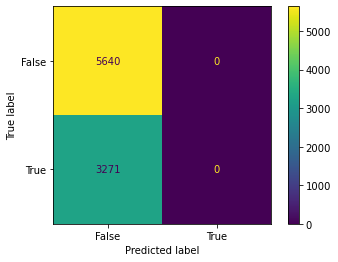

In [274]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

# AdaBoost Classifier

In [228]:
abc = AdaBoostClassifier()
model = abc.fit(X_train, y_train)

In [229]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]

In [230]:
grid_search = GridSearchCV(estimator=abc, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X,y)

In [280]:
print(confusion_matrix(y_test, abc.predict(X_test)))
print(classification_report(y_test,y_pred))
print("Train Accuracy: ", accuracy_score(y_train, abc.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

[[4340 1300]
 [ 949 2322]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      5640
           1       0.60      0.59      0.60      3271

    accuracy                           0.71      8911
   macro avg       0.68      0.68      0.68      8911
weighted avg       0.70      0.71      0.71      8911

Train Accuracy:  0.7471451418310373
Test Accuracy:  0.7059813713387948


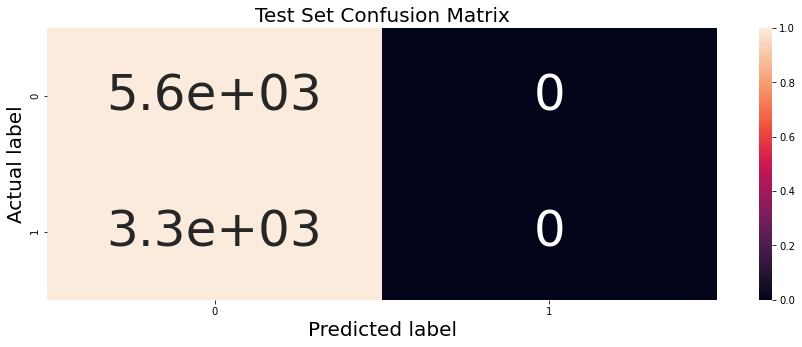

In [276]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,5))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

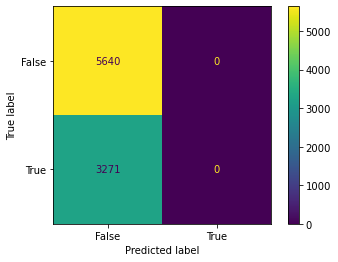

In [277]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])

cm_display.plot()
plt.show()

# Lime with best model

In [239]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No', 'Yes'],
    mode='classification'
)

In [265]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=lr_clf.predict_proba
)

exp.show_in_notebook(show_table=True)